<a href="https://colab.research.google.com/github/vokiet2005/TTNT/blob/main/baitaptuan5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 I. LÝ THUYẾT THUẬT TOÁN K-MEANS
 1. K-Means là gì?

K-Means là thuật toán phân cụm (clustering) trong học không giám sát (unsupervised learning).
Mục tiêu: chia dữ liệu thành K cụm, sao cho:

Các điểm trong cùng một cụm giống nhau

Các cụm khác nhau càng khác nhau càng tốt

K-Means hoạt động dựa trên khoảng cách Euclid giữa các điểm dữ liệu.

 2. Ý tưởng thuật toán

Lặp đi lặp lại 2 bước:

Bước 1 – Assignment (Gán nhãn):

Gán mỗi điểm dữ liệu vào cụm có tâm gần nhất.

Bước 2 – Update (Cập nhật tâm):

Tính tâm cụm mới bằng trung bình của các điểm thuộc cụm.

Thuật toán dừng khi tâm cụm không thay đổi nữa (hội tụ).

 II. ỨNG DỤNG CỦA K-MEANS
1. Thực tế

Nhóm khách hàng (Customer segmentation)

Nhận dạng ảnh – phân vùng ảnh (Image Segmentation)

Nhóm văn bản, phân loại tài liệu

Phát hiện bất thường (Anomaly Detection)

Tối ưu điểm đặt cửa hàng

Tạo màu palette trong đồ họa

 2. Trong trí tuệ nhân tạo

Tiền xử lý cho các thuật toán khác

Giảm số lượng điểm dữ liệu

Tìm các mẫu dữ liệu không gán nhãn

III. PHÂN TÍCH CHI TIẾT TỪNG HÀM TRONG CODE
 1. Hàm khởi tạo tâm cụm
def kmeans_init_centers(X, k):
    return X[np.random.choice(X.shape[0], k, replace=False)]

 Ý nghĩa:

Chọn ngẫu nhiên k điểm trong tập dữ liệu làm tâm cụm ban đầu.

replace=False đảm bảo không chọn trùng điểm.

Lý do:

Khởi tạo tốt ảnh hưởng lớn đến kết quả phân cụm.

 2. Hàm dự đoán nhãn
def kmeans_predict_labels(X, centers):
    D = cdist(X, centers)
    return np.argmin(D, axis=1)

 Ý nghĩa:

Tính ma trận khoảng cách giữa tất cả điểm dữ liệu và tâm cụm: cdist.

np.argmin: lấy chỉ số tâm gần nhất → chính là nhãn cụm.

 Ví dụ:

Nếu tâm gần nhất là tâm số 2 → nhãn = 2.

 3. Hàm cập nhật tâm cụm
def kmeans_update_centers(X, labels, k):
    centers = np.zeros((k, X.shape[1]))
    for i in range(k):
        centers[i] = np.mean(X[labels == i], axis=0)
    return centers

Ý nghĩa:

Tính tâm cụm mới bằng trung bình cộng của tất cả điểm trong cụm đó:

𝑐
𝑒
𝑛
𝑡
𝑒
𝑟
𝑖
=
1
𝑛
𝑖
∑
𝑥
∈
𝑐
𝑙
𝑢
𝑠
𝑡
𝑒
𝑟
𝑖
𝑥
center
i
	​

=
n
i
	​

1
	​

x∈cluster
i
	​

∑
	​

x
 4. Hàm kiểm tra hội tụ
def kmeans_has_converged(old, new):
    return set([tuple(a) for a in old]) == set([tuple(a) for a in new])

Ý nghĩa:

Chuyển tâm cụm thành “tuple” để dễ so sánh.

Khi tâm cũ == tâm mới → thuật toán hội tụ → dừng lại.

K-Means luôn hội tụ sau một số vòng lặp.

 5. Hàm vẽ biểu đồ
def kmeans_visualize(X, centers, labels, k, title):
    ...

✔ Ý nghĩa:

Vẽ từng cụm bằng màu khác

Vẽ tâm cụm bằng dấu X màu đen

Dễ dùng để nhìn trực quan kết quả phân cụm.

 6. Thuật toán K-Means hoàn chỉnh
def kmeans(X, k):
    centers = kmeans_init_centers(X, k)
    labels = np.zeros(X.shape[0])
    times = 0

    while True:
        labels = kmeans_predict_labels(X, centers)
        new_centers = kmeans_update_centers(X, labels, k)

        if kmeans_has_converged(centers, new_centers):
            break

        centers = new_centers
        times += 1

    return centers, labels, times

 Mô tả logic:
1 Khởi tạo tâm
2 Lặp:

Gán nhãn

Cập nhật tâm mới

Kiểm tra hội tụ

Nếu chưa hội tụ → tiếp tục lặp

 Trả về:

Tâm cuối

Nhãn cuối

Số vòng lặp thực hiện

 IV. LUỒNG CHẠY CỦA TOÀN BỘ CHƯƠNG TRÌNH

Tạo dữ liệu gồm 3 cụm: X0, X1, X2

Ghép lại thành X

Chạy K-Means

Thuật toán:

Chọn tâm ban đầu

Gán nhãn

Cập nhật tâm

Lặp đến khi hội tụ

In kết quả

Vẽ biểu đồ phân cụm

K-Means converged after: 4 iterations
Final centers:
 [[4.04903986 8.98718137]
 [9.0820572  1.9091677 ]
 [1.88925682 2.08957317]]


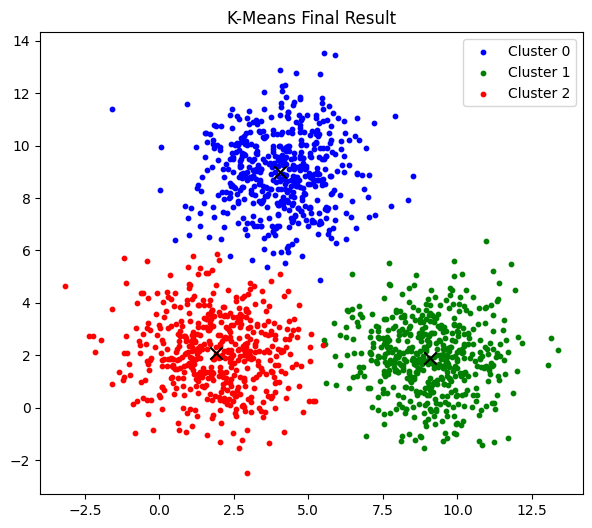

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

# Bước 1: tạo dữ liệu
means = [[2, 2], [9, 2], [4, 9]]
cov = [[2, 0], [0, 2]]
n_samples = 500
n_cluster = 3

X0 = np.random.multivariate_normal(means[0], cov, n_samples)
X1 = np.random.multivariate_normal(means[1], cov, n_samples)
X2 = np.random.multivariate_normal(means[2], cov, n_samples)

X = np.concatenate((X0, X1, X2), axis=0)

# Bước 2: hàm khởi tạo tâm cụm
def kmeans_init_centers(X, k):
    return X[np.random.choice(X.shape[0], k, replace=False)]

# Bước 3: dự đoán nhãn
def kmeans_predict_labels(X, centers):
    D = cdist(X, centers)
    return np.argmin(D, axis=1)

# Bước 4: cập nhật tâm cụm
def kmeans_update_centers(X, labels, k):
    centers = np.zeros((k, X.shape[1]))
    for i in range(k):
        centers[i] = np.mean(X[labels == i], axis=0)
    return centers

# Bước 5: kiểm tra hội tụ
def kmeans_has_converged(old, new):
    return set([tuple(a) for a in old]) == set([tuple(a) for a in new])

# Bước 6: vẽ biểu đồ
def kmeans_visualize(X, centers, labels, k, title):
    plt.figure(figsize=(7, 6))
    plt.title(title)
    colors = ['b', 'g', 'r', 'c', 'm', 'y']

    for i in range(k):
        data = X[labels == i]
        plt.scatter(data[:, 0], data[:, 1], s=10, c=colors[i], label=f"Cluster {i}")
        plt.scatter(centers[i, 0], centers[i, 1], s=80, c='black', marker='x')

    plt.legend()
    plt.show()

# Bước 7: thuật toán K-Means hoàn chỉnh
def kmeans(X, k):
    centers = kmeans_init_centers(X, k)
    labels = np.zeros(X.shape[0])
    times = 0

    while True:
        labels = kmeans_predict_labels(X, centers)
        new_centers = kmeans_update_centers(X, labels, k)

        if kmeans_has_converged(centers, new_centers):
            break

        centers = new_centers
        times += 1

    return centers, labels, times

# Chạy thuật toán
centers, labels, times = kmeans(X, n_cluster)
print("K-Means converged after:", times, "iterations")
print("Final centers:\n", centers)

# Vẽ kết quả cuối
kmeans_visualize(X, centers, labels, n_cluster, "K-Means Final Result")


I. LÝ THUYẾT THUẬT TOÁN K-NN (K-Nearest Neighbors)
 1. K-NN là gì?

K-NN là thuật toán phân loại (classification) thuộc nhóm học có giám sát (supervised learning).

Ý tưởng chính:

Một điểm dữ liệu mới thuộc về lớp mà hầu hết các điểm lân cận gần nó nhất thuộc về.

(k lân cận = K Nearest Neighbors)

 2. Nguyên lý hoạt động

Cho 1 điểm cần dự đoán X_test:

Tính khoảng cách từ X_test → tất cả điểm trong X_train

Chọn ra k điểm gần nhất

Lấy lớp xuất hiện nhiều nhất trong k điểm → kết quả dự đoán

K-NN không xây mô hình → gọi là lazy learning (học lười).

 3. Ưu điểm

Dễ hiểu, dễ cài đặt

Không cần huấn luyện phức tạp

Hiệu quả trong các bài toán nhỏ

 4. Nhược điểm

Tính toán chậm khi dữ liệu lớn

Nhạy cảm với nhiễu

Cần chuẩn hóa dữ liệu

 5. Ứng dụng thực tế

Nhận dạng ảnh (ví dụ nhận dạng chữ viết tay MNIST)

Hệ thống gợi ý (recommendation)

Phát hiện bất thường (anomaly detection)

Chẩn đoán y khoa

Tìm kiếm theo độ tương tự (similarity search)

 II. GIẢI THÍCH CHI TIẾT TỪNG HÀM CODE K-NN (TỰ CÀI ĐẶT)

Dưới đây là đoạn code K-NN bạn tự xây dựng:

def KNN(X_train, X_test, y_train, k):

 Hàm chính

– Nhận vào:

X_train : dữ liệu huấn luyện

X_test : dữ liệu cần dự đoán

y_train : nhãn tương ứng

k : số lượng lân cận

 1. Tính khoảng cách
num_test = X_test.shape[0]
num_train = X_train.shape[0]

distances = np.zeros((num_test, num_train))


 Tạo ma trận khoảng cách distances[i][j] = khoảng cách điểm test i với điểm train j.

 Vòng lặp tính khoảng cách Euclid
for i in range(num_test):
    for j in range(num_train):
        distances[i, j] = np.sqrt(np.sum((X_test[i] - X_train[j])**2))


 Tính khoảng cách Euclid:

𝑑
=
∑
(
𝑥
𝑡
𝑒
𝑠
𝑡
−
𝑥
𝑡
𝑟
𝑎
𝑖
𝑛
)
2
d=
∑(x
test
	​

−x
train
	​

)
2
	​


 Cách tính này đúng chuẩn K-NN.

 2. Chọn K điểm gần nhất
zipped = list(zip(row, y_train))
sorted_list = sorted(zipped, key=lambda x: x[0])
topk = sorted_list[:k]


Ghép khoảng cách + nhãn

Sắp xếp theo khoảng cách tăng dần

Lấy k phần tử đầu tiên → đúng K lân cận nhất

 3. Đếm số lần xuất hiện của từng lớp
classes = {}
for _, label in topk:
    label = int(label)
    classes[label] = classes.get(label, 0) + 1


 Tạo dictionary đếm số lượng mỗi lớp trong top-k.

Ví dụ:
k = 3 → top-k = [class 1, class 1, class 3]

→ classes = {1: 2, 3: 1}

 4. Chọn lớp xuất hiện nhiều nhất
results.append(max(classes, key=classes.get))


➜ Lớp có số phiếu cao nhất ⇒ kết quả dự đoán.

 5. Trả về kết quả
return np.array(results)

 III. GIẢI THÍCH CODE K-NN CỦA SKLEARN

Tiếp theo bạn có đoạn dùng sklearn:

X, y = make_blobs(n_samples=100, n_features=2, centers=4, cluster_std=1, random_state=42)


 Tạo dữ liệu gồm 4 cụm

 Chia train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)


 75% train – 25% test

 Huấn luyện mô hình KNN
knn = KNeighborsClassifier(5)
knn.fit(X_train, y_train)


k = 5

.fit() huấn luyện mô hình

 Dự đoán
y_pred = knn.predict(X_test)


Dự đoán nhãn cho tập test

Vẽ biểu đồ
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, s=40)
plt.title("K-NN with k=5")
plt.show()


Vẽ điểm test + màu theo nhãn dự đoán

IV. So sánh "K-NN tự cài đặt" vs "Sklearn"
Thành phần	Tự cài	Sklearn
Tính khoảng cách	Bạn tự code	Tối ưu C/C++ cực nhanh
Tìm k lân cận	Tự dùng sorted	Dùng thuật toán KD-Tree / Ball-Tree
Tốc độ	Chậm khi dữ liệu lớn	Cực nhanh
Độ chính xác	Giống Sklearn	Chuẩn công nghiệp



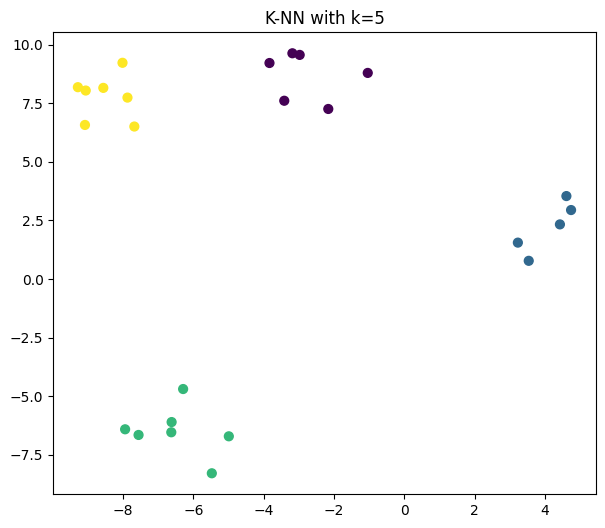

In [2]:
# ============================
# FULL CODE K-NN DÙNG sklearn
# ============================

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Bước 1: tạo dữ liệu
X, y = make_blobs(n_samples=100, n_features=2, centers=4, cluster_std=1, random_state=42)

# Bước 2: chia train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Bước 3: train k=5
knn = KNeighborsClassifier(5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Vẽ kết quả
plt.figure(figsize=(7, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, s=40)
plt.title("K-NN with k=5")
plt.show()


In [5]:
# ============================
# FULL CODE K-NN TỰ CÀI ĐẶT
# ============================

import numpy as np
from sklearn.datasets import make_blobs

def KNN(X_train, X_test, y_train, k):
    num_test = X_test.shape[0]
    num_train = X_train.shape[0]

    distances = np.zeros((num_test, num_train))

    for i in range(num_test):
        for j in range(num_train):
            distances[i, j] = np.sqrt(np.sum((X_test[i] - X_train[j])**2))

    results = []

    for row in distances:
        zipped = list(zip(row, y_train))
        sorted_list = sorted(zipped, key=lambda x: x[0])
        topk = sorted_list[:k]

        classes = {}
        for _, label in topk:
            label = int(label)
            classes[label] = classes.get(label, 0) + 1

        results.append(max(classes, key=classes.get))

    return np.array(results)

# Test
X, y = make_blobs(n_samples=500, n_features=2, centers=4, random_state=4)

X_test = np.array([[1, 3]])
print("Predict class:", KNN(X, X_test, y, 3))


Predict class: [0]


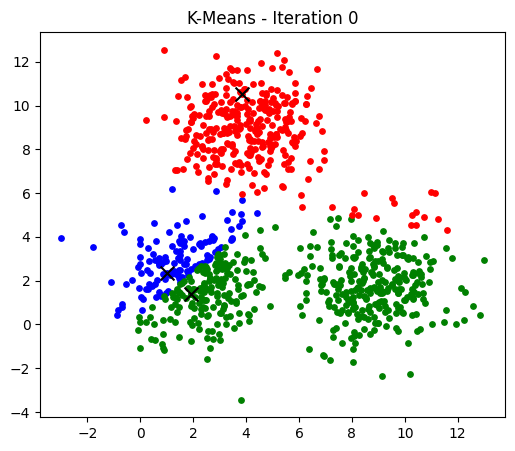

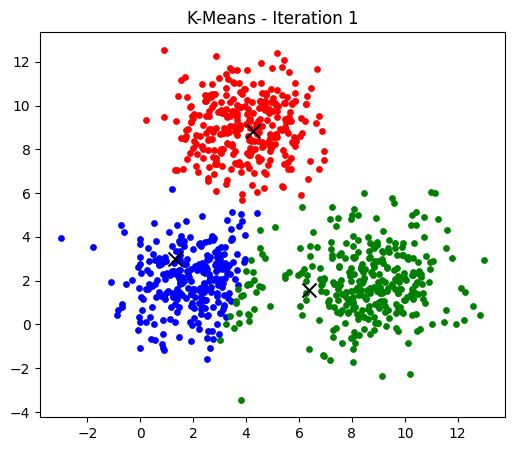

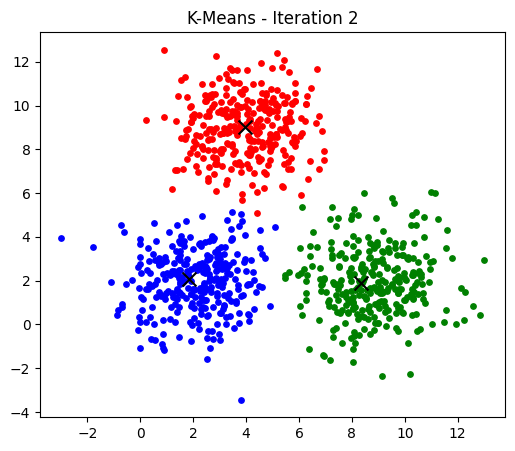

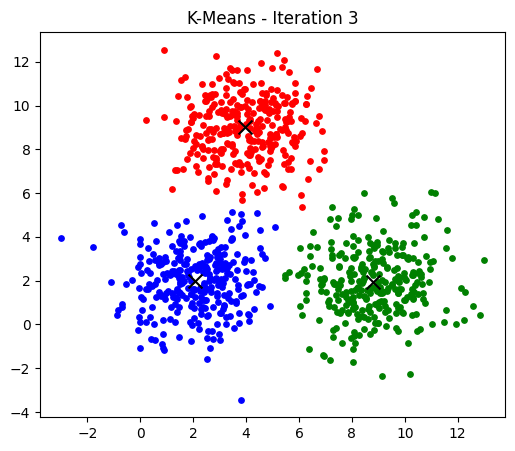

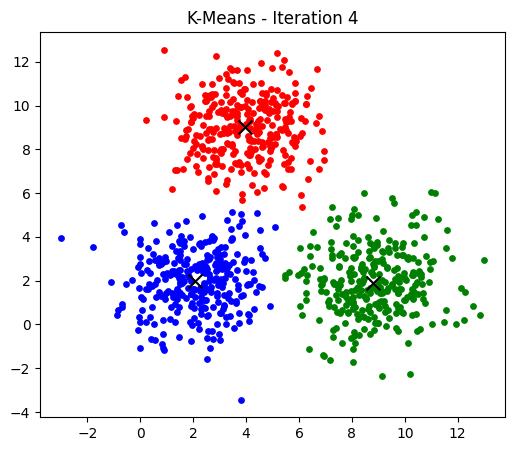

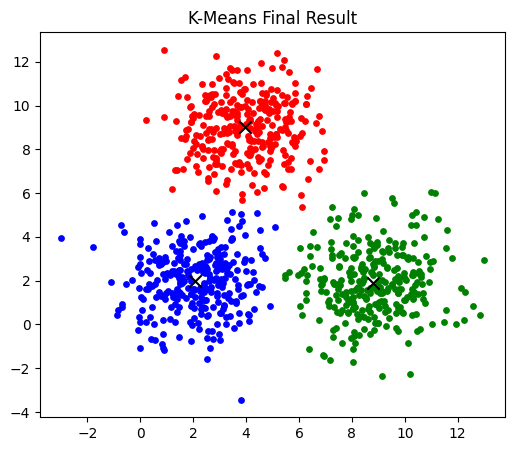

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

# --------------------------------------------
# Hàm vẽ cụm trong từng vòng lặp
# --------------------------------------------
def visualize_step(X, centers, labels, iteration):
    plt.figure(figsize=(6, 5))
    plt.title(f"K-Means - Iteration {iteration}")
    colors = ['b', 'g', 'r']

    for i in range(3):
        cluster = X[labels == i]
        plt.scatter(cluster[:, 0], cluster[:, 1], s=15, c=colors[i])
        plt.scatter(centers[i, 0], centers[i, 1], marker='x', s=100, c='black')

    plt.show()

# --------------------------------------------
# Hàm khởi tạo tâm cụm
# --------------------------------------------
def init_centers(X, k):
    return X[np.random.choice(X.shape[0], k, replace=False)]

# --------------------------------------------
# Gán nhãn cho từng điểm
# --------------------------------------------
def assign_labels(X, centers):
    D = cdist(X, centers)
    return np.argmin(D, axis=1)

# --------------------------------------------
# Cập nhật tâm cụm
# --------------------------------------------
def update_centers(X, labels, k):
    return np.array([X[labels == i].mean(axis=0) for i in range(k)])

# --------------------------------------------
# Kiểm tra hội tụ
# --------------------------------------------
def converged(old, new):
    return np.all(old == new)

# --------------------------------------------
# Thuật toán K-Means hoàn chỉnh
# --------------------------------------------
def KMEANS(X, k):
    centers = init_centers(X, k)
    iteration = 0

    while True:
        labels = assign_labels(X, centers)
        new_centers = update_centers(X, labels, k)

        visualize_step(X, centers, labels, iteration)

        if converged(centers, new_centers):
            break

        centers = new_centers
        iteration += 1

    return centers, labels


# -----------------------------
# Chạy demo
# -----------------------------
# Tạo dữ liệu
means = [[2, 2], [9, 2], [4, 9]]
cov = [[2, 0], [0, 2]]

X = np.concatenate([
    np.random.multivariate_normal(means[0], cov, 300),
    np.random.multivariate_normal(means[1], cov, 300),
    np.random.multivariate_normal(means[2], cov, 300),
])

# Chạy thuật toán
final_centers, final_labels = KMEANS(X, 3)

# Vẽ kết quả cuối
plt.figure(figsize=(6, 5))
colors = ['b', 'g', 'r']
plt.title("K-Means Final Result")

for i in range(3):
    cluster = X[final_labels == i]
    plt.scatter(cluster[:, 0], cluster[:, 1], s=15, c=colors[i])
    plt.scatter(final_centers[i, 0], final_centers[i, 1], s=80, c='black', marker='x')

plt.show()


Nhập X: 3
Nhập Y: 5
Kết quả dự đoán lớp: 0


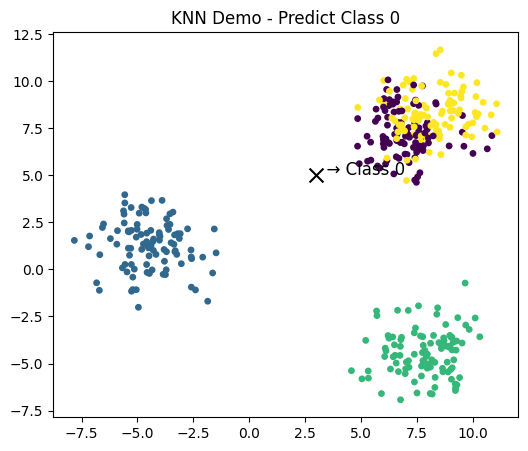

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier

# --------------------------------------------
# Tạo dữ liệu
# --------------------------------------------
X, y = make_blobs(n_samples=400, n_features=2, centers=4, cluster_std=1.2)

# Train KNN
model = KNeighborsClassifier(5)
model.fit(X, y)

# --------------------------------------------
# Vẽ dữ liệu + điểm cần dự đoán
# --------------------------------------------
def visualize_knn(point, pred):
    plt.figure(figsize=(6, 5))
    plt.title(f"KNN Demo - Predict Class {pred}")

    plt.scatter(X[:, 0], X[:, 1], c=y, s=15)
    plt.scatter(point[0], point[1], c='black', s=100, marker='x')
    plt.text(point[0], point[1], f"  → Class {pred}", fontsize=12)

    plt.show()

# --------------------------------------------
# Demo nhập điểm
# --------------------------------------------
px = float(input("Nhập X: "))
py = float(input("Nhập Y: "))
point = np.array([[px, py]])

pred = model.predict(point)[0]

print("Kết quả dự đoán lớp:", pred)
visualize_knn(point[0], pred)
